# 01_eda_overview.ipynb

# Exploratory Overview of All Datasets  
This notebook gives a high-level summary of every CSV in `data/` so you know where to dig deeper.

## 1. Setup & Library Imports

Load common libraries and your EDA utilities.



In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# Add project root to sys.path for local imports
# This allows importing from the 'src' directory
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


# Plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)
sns.set_style('whitegrid')

# Utility functions
from src.eda_utils import (
    load_datasets,
    show_basic_info,
    missing_value_summary,
    zero_value_summary
)


## 2. Load All Datasets

Automatically detect all `.csv` files in `data/` and load them into a dict of DataFrames.



In [ ]:
# Define the tables to load
TABLES = [
    "application_train",
    "bureau",
    "previous_application",
    "bureau_balance",
    "credit_card_balance",
    "installments_payments",
    "POS_CASH_balance",
]

# Point to data folder
DATA_DIR = '../data/'

# Load every CSV
datasets = {}
for name in TABLES:
    path = os.path.join(DATA_DIR, f"{name}.csv")
    datasets[name] = pd.read_csv(path)

# Print the keys
print("Loaded tables:", list(datasets.keys()))


Loaded tables: ['application_train', 'bureau', 'previous_application', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'POS_CASH_balance']


## 3. Table Shapes & Column Counts

Quickly see number of rows, columns, and data types per table.


In [ ]:
# Iterate through each table
for name, df in datasets.items():
    print(f"\n▶ {name}")
    show_basic_info(df)



▶ application_train
  shape: (307511, 122)
  dtypes: {dtype('float64'): 65, dtype('int64'): 41, dtype('O'): 16}


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



▶ bureau
  shape: (1716428, 17)
  dtypes: {dtype('float64'): 8, dtype('int64'): 6, dtype('O'): 3}


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN



▶ previous_application
  shape: (1670214, 37)
  dtypes: {dtype('O'): 16, dtype('float64'): 15, dtype('int64'): 6}


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0



▶ bureau_balance
  shape: (27299925, 3)
  dtypes: {dtype('int64'): 2, dtype('O'): 1}


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C



▶ credit_card_balance
  shape: (3840312, 23)
  dtypes: {dtype('float64'): 15, dtype('int64'): 7, dtype('O'): 1}


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0



▶ installments_payments
  shape: (13605401, 8)
  dtypes: {dtype('float64'): 5, dtype('int64'): 3}


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000



▶ POS_CASH_balance
  shape: (10001358, 8)
  dtypes: {dtype('int64'): 5, dtype('float64'): 2, dtype('O'): 1}


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


## 4. Missing-Value Overview

Compare missing-value ratios across all tables.  
Top 5 columns per table with the highest % missing.



▶ application_train — top missing columns
                          missing_ratio
COMMONAREA_MEDI                0.698723
COMMONAREA_AVG                 0.698723
COMMONAREA_MODE                0.698723
NONLIVINGAPARTMENTS_MODE       0.694330
NONLIVINGAPARTMENTS_AVG        0.694330


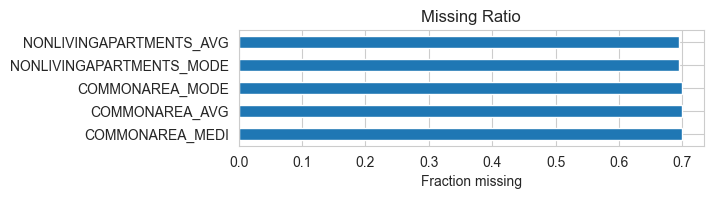


▶ bureau — top missing columns
                        missing_ratio
AMT_ANNUITY                  0.714735
AMT_CREDIT_MAX_OVERDUE       0.655133
DAYS_ENDDATE_FACT            0.369170
AMT_CREDIT_SUM_LIMIT         0.344774
AMT_CREDIT_SUM_DEBT          0.150119


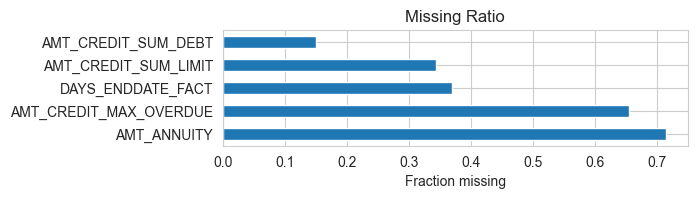


▶ previous_application — top missing columns
                          missing_ratio
RATE_INTEREST_PRIVILEGED       0.996437
RATE_INTEREST_PRIMARY          0.996437
AMT_DOWN_PAYMENT               0.536365
RATE_DOWN_PAYMENT              0.536365
NAME_TYPE_SUITE                0.491198


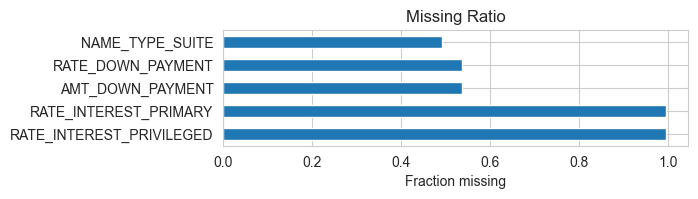


▶ bureau_balance — top missing columns
                missing_ratio
SK_ID_BUREAU              0.0
MONTHS_BALANCE            0.0
STATUS                    0.0


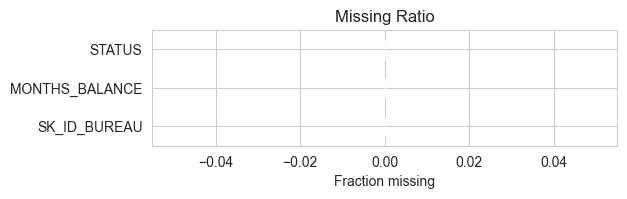


▶ credit_card_balance — top missing columns
                            missing_ratio
AMT_PAYMENT_CURRENT              0.199981
AMT_DRAWINGS_ATM_CURRENT         0.195249
CNT_DRAWINGS_POS_CURRENT         0.195249
AMT_DRAWINGS_OTHER_CURRENT       0.195249
AMT_DRAWINGS_POS_CURRENT         0.195249


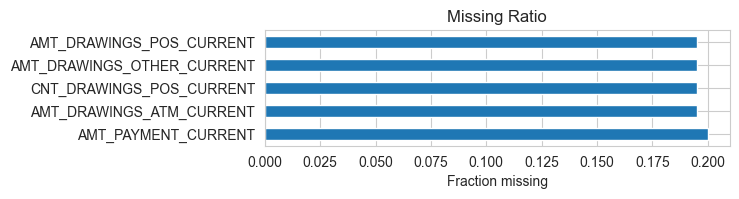


▶ installments_payments — top missing columns
                        missing_ratio
DAYS_ENTRY_PAYMENT           0.000214
AMT_PAYMENT                  0.000214
SK_ID_PREV                   0.000000
SK_ID_CURR                   0.000000
NUM_INSTALMENT_VERSION       0.000000


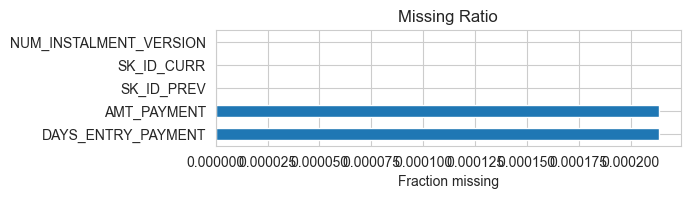


▶ POS_CASH_balance — top missing columns
                       missing_ratio
CNT_INSTALMENT_FUTURE       0.002608
CNT_INSTALMENT              0.002607
SK_ID_PREV                  0.000000
SK_ID_CURR                  0.000000
MONTHS_BALANCE              0.000000


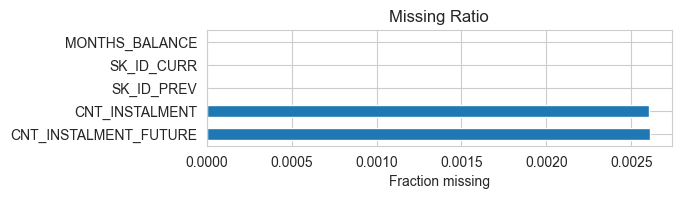

In [17]:
for name, df in datasets.items():
    print(f"\n▶ {name} — top missing columns")
    missing_value_summary(df, top_n=5)

## 5. Zero-Value Overview

Many features encode flags or codes as zeros.  
Show top 5 columns per table with highest fraction of zeros.



▶ application_train — top zero-value columns
                  zero_ratio
FLAG_DOCUMENT_12    0.999993
FLAG_DOCUMENT_10    0.999977
FLAG_DOCUMENT_2     0.999958
FLAG_DOCUMENT_4     0.999919
FLAG_DOCUMENT_7     0.999808


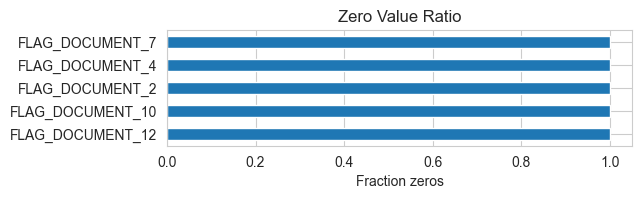


▶ bureau — top zero-value columns
                        zero_ratio
AMT_CREDIT_SUM_OVERDUE    0.997578
CREDIT_DAY_OVERDUE        0.997543
CNT_CREDIT_PROLONG        0.994690
AMT_CREDIT_SUM_LIMIT      0.611818
AMT_CREDIT_SUM_DEBT       0.592180


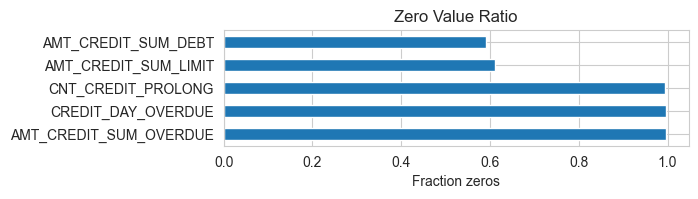


▶ previous_application — top zero-value columns
                           zero_ratio
NFLAG_INSURED_ON_APPROVAL    0.398468
AMT_APPLICATION              0.234941
RATE_DOWN_PAYMENT            0.221441
AMT_DOWN_PAYMENT             0.221441
AMT_CREDIT                   0.201632


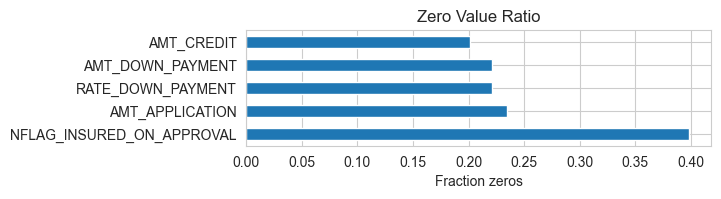


▶ bureau_balance — top zero-value columns
                zero_ratio
MONTHS_BALANCE     0.02238
SK_ID_BUREAU       0.00000
STATUS             0.00000


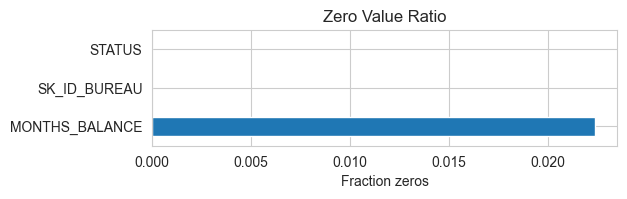


▶ credit_card_balance — top zero-value columns
                            zero_ratio
SK_DPD_DEF                    0.976736
SK_DPD                        0.960067
CNT_DRAWINGS_CURRENT          0.841065
AMT_DRAWINGS_CURRENT          0.839370
AMT_DRAWINGS_OTHER_CURRENT    0.801540


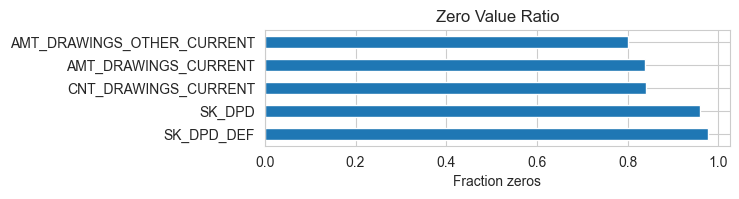


▶ installments_payments — top zero-value columns
                        zero_ratio
NUM_INSTALMENT_VERSION    0.300065
AMT_PAYMENT               0.000106
AMT_INSTALMENT            0.000021
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000


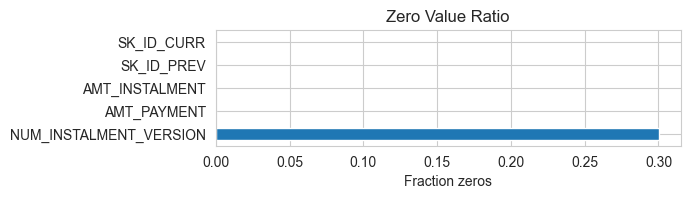


▶ POS_CASH_balance — top zero-value columns
                       zero_ratio
SK_DPD_DEF               0.988605
SK_DPD                   0.970481
CNT_INSTALMENT_FUTURE    0.118580
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000


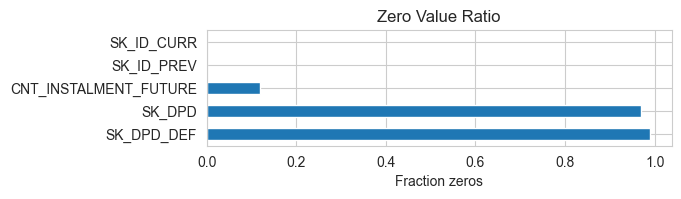

In [18]:
for name, df in datasets.items():
    print(f"\n▶ {name} — top zero-value columns")
    zero_value_summary(df, top_n=5)

## 6. Summary & Next Steps

Based on the above, decide which tables need a full EDA notebook:

- **application_train**: Target present, imbalance, rich numerics => deep dive
- **bureau**: Aggregations needed, no target
- **installments**: Same
- **previous_application**, **bureau_balance**, etc.: maybe shallow dive